<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_09_MatricesAutovaloresAutovectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import torch as pt
import sympy as sp
import matplotlib.pyplot as plt


# Autovalores, autovectores, diagonalización

Una matriz es diagonalizable cuando es semejante a una matriz diagonal. Esto significa que mediante un cambio de base, podemos reducir la matriz original a una forma diagonal. Para que una matriz sea diagonalizable, debe cumplir las siguientes condiciones:

**Autovectores linealmente independientes**: Una matriz $(A \in \mathbb{R}^{n \times n})$ es diagonalizable si y solo si tiene (n) autovectores linealmente independientes. Esto significa que los autovectores asociados a los autovalores deben ser linealmente independientes.

**Semejanza**: Existe una matriz invertible (P) tal que ($P^{-1}AP = D$), donde (D) es una matriz diagonal formada por los autovalores de (A).

La diagonalización es un proceso que transforma una matriz cuadrada ( A ) en una matriz diagonal ( D ) mediante una matriz invertible ( P ), tal que:

$P^{-1}AP = D$

La matriz diagonal ( D ) contiene los autovalores de ( A ) en la diagonal principal, y las columnas de ( P ) son los autovectores correspondientes a esos autovalores.

## Numpy

In [25]:
# Definir una matriz 3x3
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)


Autovalores: [6.164248 1.608618 3.227134]
Autovectores:
 [[-0.661115  0.561818 -0.497279]
 [-0.715409 -0.671761  0.192165]
 [-0.226091  0.482801  0.846041]]


### Matriz Diagonal

In [26]:
D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

array([[ 6.164248,  0.      , -0.      ],
       [-0.      ,  1.608618, -0.      ],
       [ 0.      , -0.      ,  3.227134]])

## Actividad:

Construir un programa que permita elevar una matriz a una potencia.


La exponencial de una matriz ( $e^A$) se define como la serie de Taylor de la función exponencial evaluada en la matriz ( A ):


\begin{equation}
e^A = I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots = \sum_{n=0}^{\infty} \frac{1}{n!}A^n
\end{equation}


Donde ( $e^D$ ) es simplemente la matriz exponencial de la matriz diagonal ( D ), que es fácil de calcular porque solo implica elevar los autovalores de (A) a la potencia de (e):



\begin{equation}
e^A = Pe^DP^{-1}
\end{equation}


Exponencial de una matriz diagonal

\begin{equation}
e^D = \begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n}
\end{bmatrix}
\end{equation}




Construir un programa que permita elevar una matriz a una potencia.

Solucion

In [27]:
def potencia(M,n):

  """  Este programa recibe una matriz M y su exponente entero n"""
  if type(n) == int and n>0:
    if M.shape[1] == M.shape[0]:
      autovalores, autovectores = np.linalg.eig(M)

      autovalores_n = autovalores**n

      identidad = np.identity(M.shape[1])

      D_n = identidad * (autovalores**n)

      U = autovectores.copy()

      U_inversa = np.linalg.inv(U)

      A_elevado_n = U @ D_n @ U_inversa
      return  A_elevado_n
    else:
       return "No es una matriz cuadrada, no se puede obtener una potencia"
  else:
    return "El exponente debe ser un numero natural"

In [28]:
""" se hace una prueba"""
A = np.array([[1,0,1],
              [0,1,0],
              [1,0,1]])

""" se pone el nombre de la matriz y el exponente en el argumento"""
potencia = potencia(A,2)
potencia

array([[2., 0., 2.],
       [0., 1., 0.],
       [2., 0., 2.]])

# Autovalores y autovectores complejos

In [29]:
theta=-np.pi/4
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

Autovalores: [0.707107+0.707107j 0.707107-0.707107j]
Autovectores:
 [[0.707107+0.j       0.707107-0.j      ]
 [0.      +0.707107j 0.      -0.707107j]]


array([[0.707107+0.707107j, 0.      +0.j      ],
       [0.      +0.j      , 0.707107-0.707107j]])

Actividad 2.

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica,




j

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola







- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola









Realice un grafico que represente la hyperbola. Diagonalice A, para ello construya la matrix Q de autovectores ortoganales tal que D=QTAQ, en este caso se dice que A es diagonalizable ortogonalmente, donde  A=QDQT

SOLUCION

Realice un grafico que represente la hyperbola

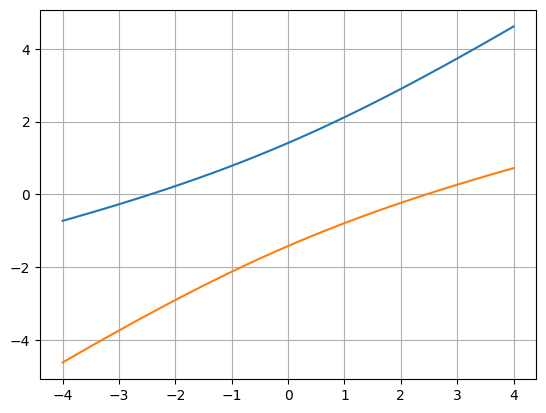

In [30]:
""" se aplica formula cuadratica en la expresion 3y2- 4xy + x2-6 =0 para hallar los valores de y llamados y1 y y2 """

y1 = lambda x: (2/3)*x + np.sqrt(((x**2)/9)+2)
y2 = lambda x:  (2/3)*x - np.sqrt(((x**2)/9)+2)


x1 = np.linspace(-4,4,100)

plt.plot(x1,y1(x1))
plt.plot(x1,y2(x1))
plt.grid()

Diagonalice A, para ello construya la matrix Q de autovectores ortoganales tal que D=QTAQ, en este caso se dice que A es diagonalizable ortogonalmente, donde  A=QDQT

In [31]:
A= np.array([[1.,-2],
              [-2,3]])


def diagonalizacion(M):
  autovaloresA, autovectoresA = np.linalg.eigh(M)
  if np.dot(autovectoresA[:,0], autovectoresA[:,1])==0:
    Q = autovectoresA.copy()
    D = Q.T @ A @ Q
    return D,Q
  else:
    print("Los vectores no son ortogonales")


D,Q = diagonalizacion(A)
D


array([[-0.236068,  0.      ],
       [ 0.      ,  4.236068]])

Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una nueva base

In [32]:
""" u = Q.T * v"""

x = sp.symbols("x")

y = sp.symbols("y")

v = (x,y)
u = Q.T @ v

D = sp.Matrix(D)

nueva_hiperbola = np.dot(D @ u,u) -6

nueva_hiperbola



(-2.22703272882321*x + 3.60341464929439*y)*(-0.525731112119133*x + 0.85065080835204*y) + (-0.85065080835204*x - 0.525731112119133*y)*(0.200811415886227*x + 0.124108280346679*y) - 6

In [33]:
f = sp.lambdify((x,y),nueva_hiperbola)


In [34]:
# Rango de valores para x e y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Crear una malla de puntos (x, y)
X, Y = np.meshgrid(x, y)

Z = f(X,Y)

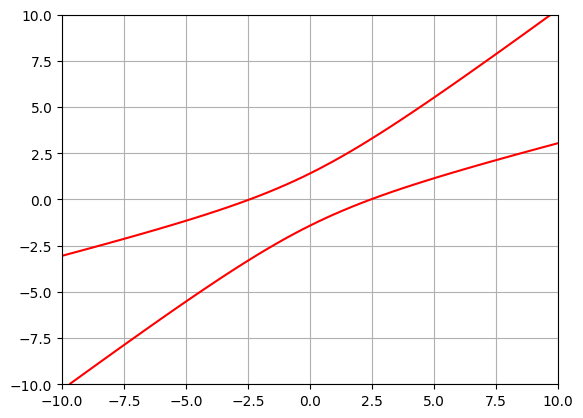

In [35]:
# Graficar la nueva hiperbola
plt.contour(X, Y, Z, [0], colors='red')
plt.grid()

### Sympy

In [36]:
from sympy import Matrix, simplify

# Definir una matriz 3x3
A = Matrix([[4, 2, 0],
            [2, 4, 1],
            [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores = A.eigenvals()
autovectores = A.eigenvects()

# Simplificar autovalores y autovectores
autovalores_simplificados = {simplify(l): m for l, m in autovalores.items()}
autovectores_simplificados = [(simplify(l), m, [simplify(v) for v in vs]) for l, m, vs in autovectores]

print("Autovalores simplificados:", autovalores_simplificados)
print("Autovectores simplificados:\n", autovectores_simplificados)


Autovalores simplificados: {11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1, (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1, (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}
Autovectores simplificados:
 [((-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)), 1, [Matrix([
[(12*(-176 + 7*2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)**2*(61 + 3*sqrt(1407)*I) + (61 + 3*sqrt(1407)*I)**(1/3)*(128*2**(1/3) + (-44 + 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))**2 + 10752*2**(1/3)*(1 + sqrt(3)

In [37]:
autovalores_simplificados

{11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1,
 (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1,
 (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}

# Pytorch

Definción de una matrix de tres formas:
Hasta ahora sabemos definir matrices como objetos de numpy y objetos de sympy, en la actualidad, el rápido crecimiento de las unidades de procesamiento gráfico GPU,  permite definir otro tipo de objetos que pueden acelerar el computo computacional.


- Como objeto de numpy
- Como objeto de sympy
- Como objeto de pytorch


La velocidad de ejecución entre PyTorch y Numpy puede variar dependiendo del tamaño de los datos y si se está utilizando o no la aceleración por GPU. Para operaciones con matrices pequeñas y cálculos que no requieren de la paralelización de una GPU, Numpy puede ser más rápido porque opera directamente en la CPU y la memoria principal. Sin embargo, para matrices grandes y operaciones que pueden ser paralelizadas, PyTorch con soporte de GPU puede ser significativamente más rápido.

Comparativa de comandos de ejecución entre pytorch, numpy  y sympy


| Operación | PyTorch | Numpy | SymPy |
|-----------|---------|-------|-------|
| Creación de una matriz | `torch.tensor([[1, 2], [3, 4]])` | `np.array([[1, 2], [3, 4]])` | `Matrix([[1, 2], [3, 4]])` |
| Transposición de una matriz | `torch.transpose(A, 0, 1)` | `A.T` o `np.transpose(A)` | `A.T` |
| Multiplicación de matrices | `torch.matmul(A, B)` | `np.dot(A, B)` o `A @ B` | `A * B` |
| Inversa de una matriz | `torch.inverse(A)` | `np.linalg.inv(A)` | `A**-1` |
| Determinante de una matriz | `torch.det(A)` | `np.linalg.det(A)` | `A.det()` |
| Autovalores y autovectores | `torch.eig(A, eigenvectors=True)` | `np.linalg.eig(A)` | `A.eigenvals()`, `A.eigenvects()` |



Ejemplo básico del comparativo de un problema de algebra lineal, rotación de un vector:

In [38]:

def matrixA(theta, tipo="numpy"):
  if(tipo=="np"):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  elif(tipo=="sp"):
    return np.array([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])

  elif(tipo=="pt"):
    return pt.tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

  else:

    print("Define el tipo de variable que desea")


In [39]:
x = sp.Symbol("x")
M = sp.Matrix(matrixA(np.pi/4, tipo="sp"))
M

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [40]:
x=np.pi/4
M = matrixA(x, tipo="np")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])

In [41]:
matrixA(x, tipo="pt")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])

Actividad: Resolver el problema de la potencia de una matriz empleando pytorch, construir.

SOLUCION

In [42]:
def potencia_py(M,n):

  if type(n) == int and n>0:
    if M.shape[1] == M.shape[0]:
      M = M.to(dtype=pt.float)

      autovalores_M, autovectores_M = pt.linalg.eig(M)

      autovalores_n = autovalores_M**n

      identidad = pt.eye(M.shape[1], dtype=pt.int)

      D_n = pt.mul(identidad, autovalores_n)
      U = autovectores_M

      U_inversa = pt.inverse(U)

      A_elevado_n = pt.matmul(pt.matmul(U,D_n),U_inversa)



      return A_elevado_n
    else:
       return "No es una matriz cuadrada, no se puede obtener una potencia"
  else:
    return "El exponente debe ser un numero natural"




In [43]:
""" Un ejemplo"""
A = pt.tensor([[4., 2, 0],
            [2, 4, 1],
            [0, 1, 3]])



In [44]:
pot = np.matrix(potencia_py(A,3)).round()
pot

matrix([[112.+0.j, 106.+0.j,  22.+0.j],
        [106.+0.j, 123.+0.j,  42.+0.j],
        [ 22.+0.j,  42.+0.j,  37.+0.j]], dtype=complex64)